In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from models import DecisionTreeClassifier
from sklearn.model_selection import KFold

# import this function from the models.py
from sklearn.metrics import accuracy_score

In [0]:
df  = pd.read_csv("cleaned_dataset.csv")
data = df.drop(["id","class"],axis=1)
target = df["class"]
X_train, X_test, y_train, y_test = train_test_split(data,target, train_size = 0.3, random_state=42)

Decision Tree Classifier

In [0]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
print("The accuracy of Decision Tree Classifier:",accuracy_score(y_test,y_pred_dt))

The accuracy of Decision Tree Classifier: 0.9136163982430454


In [0]:
y_pred_dt[:10]

0    2
1    2
2    4
3    4
4    2
5    2
6    4
7    2
8    4
9    2
dtype: int64

k-NN Classifier

SVM Classifier

In [0]:
y_pred_all = []
for i in range(len(y_test)):
    y_pred_all.append(
        mode([
              y_pred_dt[i],
              y_pred_knn[i],
              y_pred_svm[i]
        ])
    )

K-fold cross validiation

In [0]:
kf = KFold(n_splits=6,shuffle=True)
kf.get_n_splits(data)


accuracy_all = {
    'Decision_Tree':[],
    'k-NN': [],
    'SVM':[]
}
for train_index, test_index in kf.split(data):
    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]

    model_dt = DecisionTreeClassifier()
    model_dt.fit(X_train, y_train)
    y_pred_dt = model_dt.predict(X_test)
    y_acc_dt = accuracy_score(y_test,y_pred_dt)
    accuracy_all['Decision_Tree'].append(y_acc_dt)

    # model_knn = 
    # model_knn.fit(X_train, y_train)
    # y_pred_knn = model_knn.predict(X_test)
    # y_acc_knn = accuracy_score(y_test,y_pred_knn)
    # accuracy_all['k-NN'].append(y_acc_knn)

    # model_svm = 
    # model_svm.fit(X_train, y_train)
    # y_pred_svm = model_svm.predict(X_test)
    # y_acc_svm = accuracy_score(y_test,y_pred_svm)
    # accuracy_all['SVM'].append(y_acc_svm)

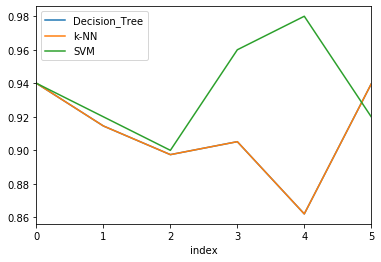

In [0]:
df_temp = pd.DataFrame(accuracy_all)
df_temp = df_temp.reset_index()
df_temp.plot(x='index', y=['Decision_Tree','k-NN','SVM'])